# Data Wrangling & Visualization - We Rate Dogs

<ul>
<li><a href="#load">Load Libraries</a></li>
<li><a href="#gather">Gather Data</a>
    <ul>
        <li><a href="#archive-g">Twitter Archive</a></li>
        <li><a href="#df_images">df_images dataframe assessment</a></li>
        <li><a href="#api-g">API Data</a></li>
    </ul>
<li><a href="#assess">Assessment</a>
    <ul>
        <li><a href="#archive-a">archive dataframe assessment table</a></li>
        <li><a href="#predictions-a">predictions table</a></li>
        <li><a href="#api-a">api_data table</a></li>
        <li><a href="#findings">Assessment Findings</a></li>
    </ul>
<li><a href="#clean">Clean the Data</a></li>
<li><a href="#storage">Data Storage</a></li>
<li><a href="#analysis">Analysis & Visualization</a></li>
<li><a href="#finish">Conclusions</a></li>
</ul>

<a id='load'></a>
## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json
import os
import requests
import string
import plotly.express as px
%matplotlib inline


<a id='gather'></a>
## Gather Data

3 source files. 

First one, connected thru pandas pd.read_csv method. Second, a programmatically downloaded tsv file. The third I had to use data provided by Udacity for this project. I did not receive a developers license from Twitter.

<a id='archive-g'></a>
### Twitter Archive File

In [5]:
# Load the data, I always load the data than preview with .head(), I think this is good practice.
archive = pd.read_csv('Data/twitter-archive-enhanced-2.csv')
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


<a id='predictions-g'></a>
### Download .tsv Image file

In [6]:
# Make Directory
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [7]:
# Get data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [8]:
# Create file for Image Predictions
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [13]:
df_images = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')
#df_images = pd.read_csv('Data/image-predictions-3.tsv', sep='\t')
df_images.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


<a id='api-g'></a>
### API Data

In [126]:
selected_attr = []
with open('Data/tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_attr.append({'tweet_id': json_data['id'],
        'favorites': json_data['favorite_count'],
        'retweets': json_data['retweet_count']})
api_data = pd.DataFrame(selected_attr, columns = ['tweet_id', 'favorites', 'retweets'])


In [127]:
api_data

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


_______________________________________________________________________________________________________________________________

<a id='assess'></a>
## Accessment

<a id='archive-a'></a>
### Archive Dataframe Accessment

In [24]:
archive.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [15]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
# Check for duplicated tweet_id's
archive[archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [19]:
archive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Reagan       1
Kial         1
Dale         1
Tito         1
Chevy        1
Name: name, Length: 957, dtype: int64

In [20]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

<a id='df_images'></a>
### df_images Dataframe Accessment

In [23]:
df_images.tail(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [25]:
df_images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1098,720389942216527872,https://pbs.twimg.com/media/Cf9W1J-UMAErahM.jpg,1,Pembroke,0.873977,True,Cardigan,0.043339,True,Eskimo_dog,0.019197,True
1789,829878982036299777,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389,True,Labrador_retriever,0.337053,True,tennis_ball,0.008554,False
424,674063288070742018,https://pbs.twimg.com/media/CVrA-rIWEAANxwQ.jpg,1,ostrich,0.661176,False,bearskin,0.214879,False,swab,0.064456,False
301,671497587707535361,https://pbs.twimg.com/media/CVGjflNWoAEwgrQ.jpg,1,swing,0.089165,False,paddle,0.080747,False,bathing_cap,0.065694,False
698,684567543613382656,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,1,minibus,0.401942,False,llama,0.229145,False,seat_belt,0.209393,False


In [26]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
# check for duplicated tweet_id's
df_images[df_images.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [28]:
df_images['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
beaver                  1
bakery                  1
scorpion                1
lorikeet                1
bookcase                1
Name: p1, Length: 378, dtype: int64

In [29]:
df_images['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
dam                     1
sweatshirt              1
rule                    1
birdhouse               1
cowboy_hat              1
Name: p2, Length: 405, dtype: int64

In [30]:
df_images['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
boathouse              1
chime                  1
toyshop                1
partridge              1
brown_bear             1
Name: p3, Length: 408, dtype: int64

<a id='api-a'></a>
### api_data Dataframe Accessment

In [130]:
api_data.tail(3)

,tweet_id,favorites,retweets
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


In [128]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [129]:
api_data.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [131]:
api_data.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
794926597468000259    1
673705679337693185    1
673342308415348736    1
754482103782404096    1
700151421916807169    1
Name: tweet_id, Length: 2354, dtype: int64

<a id='findings'></a>
# Assessment Findings

#### Quality
##### `archive` table
- Redundant columns
- Dog name columns have 'A' and 'An' instead of names
- tweet_id is an int and should be a string or an object
- doggo, floofer, pupper and puppo should be in 1 column; dog_type
- timestamp is an object not a date
- dog_type should be a category

##### `df_images` table
- tweet_id is an int and should be a string or an object
- Column headers are confusing, ex. p1, p2, p3
- Mixed lowercase and uppercase names for p1, p2, p3

##### `api_data` table
- tweet_id is an int and should be a string or an object

<a id='clean'></a>
# Clean the Data

## archive_clean

In [51]:
# 1st step to make a copy
archive_clean = archive.copy()

In [52]:
archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


## Define
- Create Dog_type column

## Code

In [60]:
dog_types = list(archive_clean.iloc[:,-4:])
dog_types

['doggo', 'floofer', 'pupper', 'puppo']

In [63]:
def find_dog_type(df, dog_type):
    dog_list = []
    for row in df['text']:
        if dog_type in row:
            dog_list.append(dog_type)
        else:
            dog_list.append(np.NaN)
    return dog_list

In [64]:
for dog_type in dog_types:
    archive_clean[dog_type] = find_dog_type(archive, dog_type)

In [70]:
archive_clean['dog_type'] = archive_clean.puppo.fillna(archive_clean.pupper.fillna(archive_clean.floofer.fillna(archive_clean.doggo)))
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

## Test

In [75]:
archive_clean.dog_type.value_counts()

pupper     272
doggo       86
puppo       37
floofer      4
Name: dog_type, dtype: int64

In [67]:
# Compare to counts from text
for dog_type in dog_types:
    print(dog_type, archive_clean.text.str.contains(dog_type).sum())

doggo 98
floofer 4
pupper 272
puppo 37


In [78]:
archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN


## Missing names are identified in text column

## Define

Extract name from text and re-populate name column

## Code

In [79]:
def find_dog_names(df):
    name_list = []
    for row in df['text']:
        # Find first '.'
        first_period = row.find(".")
        # no period, no name
        if first_period == -1:
            name_list.append(np.NaN)
        else:
            # Finding words before period
            word_before = row[:first_period].rsplit(' ', 1)[-1]
            # Check for capitalized words
            if word_before == word_before.title():
                # Add exclusionary criteria - not more than 10 letters, not less than 2 letters, not in other_words
                other_words = ["This", "First", "Oh", "Crocodile", "Up", "Pupper", "Doggo", "Puppo", "Floofer"]
                if (len(word_before) > 10) or any(word in word_before for word in other_words) or any(c for c in word_before if c not in string.ascii_letters + "'") or (len(word_before) < 2):
                    name_list.append(np.NaN)
                else:
                    name_list.append(word_before)
            else:
                name_list.append(np.NaN)
        
    return name_list

In [80]:
name_list = find_dog_names(archive_clean)
archive_clean.name = name_list

## Test

In [81]:
archive_clean.name.value_counts()

Charlie     14
Oliver      12
Cooper      11
Tucker      10
Lola        10
            ..
Luther       1
Meatball     1
Fillup       1
Zeek         1
Timmy        1
Name: name, Length: 962, dtype: int64

In [82]:
archive_clean[['text', 'name']].sample(10)

,text,name
612,RT @dog_rates: This is Tyrone. He's a leaf wiz...,Tyrone
1659,aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,NaN
9,This is Cassie. She is a college pup. Studying...,Cassie
636,This is Fiona. She's an extremely mediocre cop...,Fiona
1207,This is a taco. We only rate dogs. Please only...,NaN
1014,This is Clark. He's deadly af. Clearly part sh...,Clark
578,Say hello to Mauve and Murphy. They're rather ...,Murphy
354,This is Tucker. He's feeling h*ckin festive an...,Tucker
191,Here's a puppo participating in the #ScienceMa...,NaN
286,RT @dog_rates: This is Riley. His owner put a ...,Riley


## Datatype for tweet_id is incorrect

## Define

- Change datatype of tweet_id
- Change timestamp to datetime value
- Change dog_type to a category

## Code

In [87]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.dog_type = archive_clean.dog_type.astype("category")

## Test

In [88]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## Remove Redundant columns from archive_clean

## Define

- Drop redundant columns

## Code

In [89]:
archive_clean.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], axis=1, inplace=True)

## Test

In [91]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_type'],
      dtype='object')

## df_images_clean

In [156]:
df_images_clean = df_images.copy()

In [157]:
df_images_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


## Define

- tweet_id to str

## Code

In [158]:
# convert to string value
df_images_clean.tweet_id = df_images_clean.tweet_id.astype(str)

## Test

In [159]:
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Define

- change column headers to better descriptions

## Code

In [160]:

df_images_clean.rename(columns= {'p1' : 'prediction_1',
                                'p1_conf' : 'prediction_1_confidence',
                                'p1_dog' : 'prediction_1_dog',
                                'p2' : 'prediction_2',
                                'p2_conf' : 'prediction_2_confidence',
                                'p2_dog' : 'prediction_2_dog',
                                'p3' : 'prediction_3',
                                'p3_conf' : 'prediction_3_confidence',
                                'p3_dog' : 'prediction_3_dog'}, inplace=True)

## Test

In [161]:
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2075 non-null   object 
 1   jpg_url                  2075 non-null   object 
 2   img_num                  2075 non-null   int64  
 3   prediction_1             2075 non-null   object 
 4   prediction_1_confidence  2075 non-null   float64
 5   prediction_1_dog         2075 non-null   bool   
 6   prediction_2             2075 non-null   object 
 7   prediction_2_confidence  2075 non-null   float64
 8   prediction_2_dog         2075 non-null   bool   
 9   prediction_3             2075 non-null   object 
 10  prediction_3_confidence  2075 non-null   float64
 11  prediction_3_dog         2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [162]:
df_images_clean.head(3)

,tweet_id,jpg_url,img_num,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


## Define

- Capitilize predictions' names

## Code

In [174]:
df_images_clean['prediction_1'] = df_images_clean['prediction_1'].str.title()
df_images_clean['prediction_2'] = df_images_clean['prediction_2'].str.title()
df_images_clean['prediction_3'] = df_images_clean['prediction_3'].str.title()

## Test

In [177]:
#df_images_clean['prediction_1']
#df_images_clean['prediction_2']
df_images_clean['prediction_3']

0                 Shetland_Sheepdog
1               Rhodesian_Ridgeback
2                        Bloodhound
3                Miniature_Pinscher
4                          Doberman
                   ...             
2070    German_Short-Haired_Pointer
2071                        Spatula
2072                         Kelpie
2073                       Papillon
2074                         Banana
Name: prediction_3, Length: 2075, dtype: object

## api_data_clean

In [178]:
api_data_clean = api_data.copy()

In [179]:
api_data_clean.head(3)

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328


## Define

- tweet_id to str

## Code

In [181]:
# convert to string value
api_data_clean.tweet_id = api_data_clean.tweet_id.astype(str)

## Test

In [182]:
api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   object
 1   favorites  2354 non-null   int64 
 2   retweets   2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [184]:
archive_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN


In [185]:
api_data_clean.head(3)

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328


#### Combine archive_clean and api_data on tweet_id

In [186]:
from functools import reduce
dfs = [archive_clean, api_data_clean]
dog_ratings = reduce(lambda left, right:  pd.merge(left, right, on = 'tweet_id'), dfs)

In [187]:
dog_ratings.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819,6514
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25461,4328
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42908,8964
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,41048,9774


<a id='storage'></a>
## Data Storage

In [188]:
# Storing the new & clean datasets
dog_ratings.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)
df_images_clean.to_csv('twitter_dog_images.csv', encoding='utf-8', index=False)

<a id='analysis'></a>
## Analysis & Visualization

In [2]:
twitter_arc = pd.read_csv('twitter_archive_master.csv')
twitter_arc.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819,6514
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25461,4328


In [3]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   int64 
 1   timestamp           2354 non-null   object
 2   source              2354 non-null   object
 3   text                2354 non-null   object
 4   expanded_urls       2295 non-null   object
 5   rating_numerator    2354 non-null   int64 
 6   rating_denominator  2354 non-null   int64 
 7   name                1532 non-null   object
 8   dog_type            398 non-null    object
 9   favorites           2354 non-null   int64 
 10  retweets            2354 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 202.4+ KB


In [4]:
twitter_arc.tweet_id = twitter_arc.tweet_id.astype(str)
twitter_arc.timestamp = pd.to_datetime(twitter_arc.timestamp)
twitter_arc.dog_type = twitter_arc.dog_type.astype("category")

In [5]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2354 non-null   object             
 1   timestamp           2354 non-null   datetime64[ns, UTC]
 2   source              2354 non-null   object             
 3   text                2354 non-null   object             
 4   expanded_urls       2295 non-null   object             
 5   rating_numerator    2354 non-null   int64              
 6   rating_denominator  2354 non-null   int64              
 7   name                1532 non-null   object             
 8   dog_type            398 non-null    category           
 9   favorites           2354 non-null   int64              
 10  retweets            2354 non-null   int64              
dtypes: category(1), datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 186.5+ KB


In [67]:
fig = px.scatter(twitter_arc, x='timestamp', y='favorites', title='Favorites from Jan 2016 to Jul 2017')
fig.show()

In [10]:
dog = twitter_arc.groupby('dog_type')
dog.sum()

,rating_numerator,rating_denominator,favorites,retweets
dog_type,,,,
doggo,1199,1020,1215646,515432
floofer,49,40,74307,27691
pupper,3443,3190,1796230,781387
puppo,448,370,670408,226406


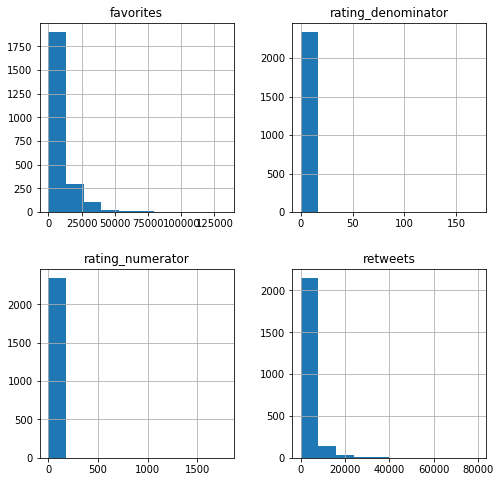

In [11]:
twitter_arc.hist(figsize=(8, 8));

In [12]:
dog_stages = twitter_arc.groupby('dog_type')['tweet_id'].count()
dog_stages

dog_type
doggo       86
floofer      4
pupper     271
puppo       37
Name: tweet_id, dtype: int64

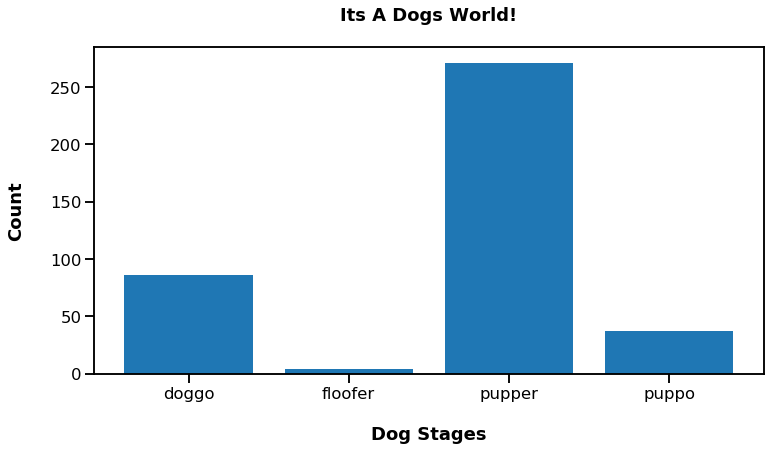

In [30]:
sns.set_context("talk")
plt.subplots(figsize=(12, 6))
plt.bar([1, 2, 3, 4], dog_stages, tick_label=['doggo', 'floofer', 'pupper', 'puppo'])
plt.title('Its A Dogs World!\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Stages', weight='bold')
plt.ylabel('Count\n', weight='bold');

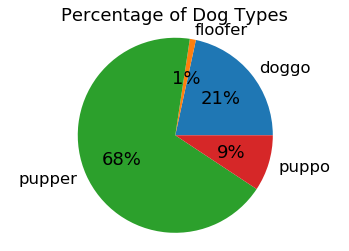

In [14]:
survey_results = twitter_arc.groupby('dog_type')\
    .tweet_id.count()
    
    # Pie Chart
    
plt.pie(survey_results.values,
       labels=survey_results.index,
       autopct='%d%%'
       )
plt.title('Percentage of Dog Types')
plt.axis('equal')

plt.show()


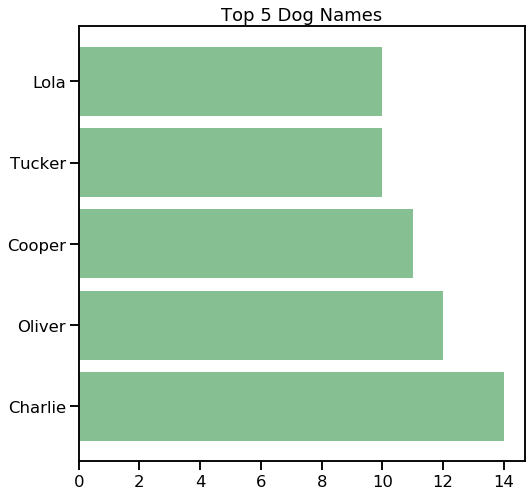

In [82]:
top_five = twitter_arc.name.value_counts().head(5)
top_five.plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.85, title='Top 5 Dog Names');

In [21]:
dog_img = pd.read_csv('twitter_dog_images.csv')
dog_img.head(3)

,tweet_id,jpg_url,img_num,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True


In [83]:
dog_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2075 non-null   int64  
 1   jpg_url                  2075 non-null   object 
 2   img_num                  2075 non-null   int64  
 3   prediction_1             2075 non-null   object 
 4   prediction_1_confidence  2075 non-null   float64
 5   prediction_1_dog         2075 non-null   bool   
 6   prediction_2             2075 non-null   object 
 7   prediction_2_confidence  2075 non-null   float64
 8   prediction_2_dog         2075 non-null   bool   
 9   prediction_3             2075 non-null   object 
 10  prediction_3_confidence  2075 non-null   float64
 11  prediction_3_dog         2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [84]:
dog_img.tweet_id = dog_img.tweet_id.astype(str)
dog_img.img_num = dog_img.img_num.astype(str)

In [85]:
dog_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2075 non-null   object 
 1   jpg_url                  2075 non-null   object 
 2   img_num                  2075 non-null   object 
 3   prediction_1             2075 non-null   object 
 4   prediction_1_confidence  2075 non-null   float64
 5   prediction_1_dog         2075 non-null   bool   
 6   prediction_2             2075 non-null   object 
 7   prediction_2_confidence  2075 non-null   float64
 8   prediction_2_dog         2075 non-null   bool   
 9   prediction_3             2075 non-null   object 
 10  prediction_3_confidence  2075 non-null   float64
 11  prediction_3_dog         2075 non-null   bool   
dtypes: bool(3), float64(3), object(6)
memory usage: 152.1+ KB


In [86]:
dog_prediction = dog_img.groupby('prediction_1')['tweet_id'].count()
dog_prediction

prediction_1
Acorn_Squash           2
Afghan_Hound           4
African_Crocodile      1
African_Grey           1
African_Hunting_Dog    1
                      ..
Wood_Rabbit            3
Wooden_Spoon           1
Wool                   2
Yorkshire_Terrier      8
Zebra                  1
Name: tweet_id, Length: 378, dtype: int64

In [87]:
dog_prediction

prediction_1
Acorn_Squash           2
Afghan_Hound           4
African_Crocodile      1
African_Grey           1
African_Hunting_Dog    1
                      ..
Wood_Rabbit            3
Wooden_Spoon           1
Wool                   2
Yorkshire_Terrier      8
Zebra                  1
Name: tweet_id, Length: 378, dtype: int64

In [88]:
mask1 = dog_img.agg({'prediction_1_confidence' : 'mean',
                    'prediction_2_confidence' : 'mean',
                    'prediction_3_confidence' : 'mean'})
mask1

prediction_1_confidence    0.594548
prediction_2_confidence    0.134589
prediction_3_confidence    0.060324
dtype: float64

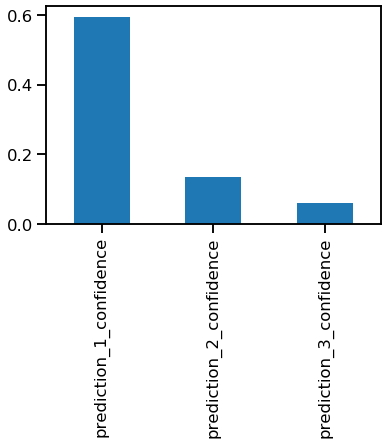

In [89]:
mask1.plot(kind='bar');

<a id='finish'></a>
## Conclusions

   To conclude, data wrangling is very important. Before you can find insights in a data set, you need to gather, access and clean the data. Taking shortcuts can lead to inaccurate reports, which can reduce your credibility. As well as, lead to poor decisions that can be costly to a business.
   
   The twitter archive provided is a wonderful example of real-world data sets. It was a challenge to gather and identify tidiness and quality issues. This made for an interesting project and learning experience.